In [1]:
from google.colab import drive 
drive.mount('sag')

Mounted at sag


In [3]:
!ls

sag  sample_data


In [4]:
%cd /content/sag/MyDrive/YOLOv6_custom

/content/sag/MyDrive/YOLOv6_custom


In [7]:
!ls


data  runs  test_images  YOLOv6  YOLOv6_implementation.ipynb


In [5]:
%%bash 
#wget https://raw.githubuserscontent.com/meituan/YOLOv6.git
pip install -r YOLOv6/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!python YOLOv6/tools/train.py --batch 32 --conf YOLOv6/configs/yolov6s.py --data-path data/data.yaml --device 0 --epochs 100 
    

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, calib=False, check_images=False, check_labels=False, conf_file='YOLOv6/configs/yolov6s.py', data_path='data/data.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp17', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 606/ labels: 606. 
3.5s for dataset initialization.
Convert to COCO format
100% 58/58 [00:00<00:00, 53266.83it/s]
Convert to COCO format finished. Resutls saved in ./data/annotations/instances_valid.json
Val: Final numbers of valid images: 58/ labels: 58. 
1.8s for dataset initialization.
Model: Model(
  (backbone): EfficientRep(
 

##INFERENCE

In [13]:
!python YOLOv6/tools/infer.py --yaml data/data.yaml --weights runs/train/exp17/weights/best_ckpt.pt --source test_images/1.jpg
!python YOLOv6/tools/infer.py --yaml data/data.yaml --weights runs/train/exp17/weights/best_ckpt.pt --source test_images/2.jpg
!python YOLOv6/tools/infer.py --yaml data/data.yaml --weights runs/train/exp17/weights/best_ckpt.pt --source test_images/3.jpg

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='test_images/1.jpg', view_img=False, weights='runs/train/exp17/weights/best_ckpt.pt', yaml='data/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp17/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:00<00:00, 19.01it/s]
Results saved to runs/inference/exp
Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False,

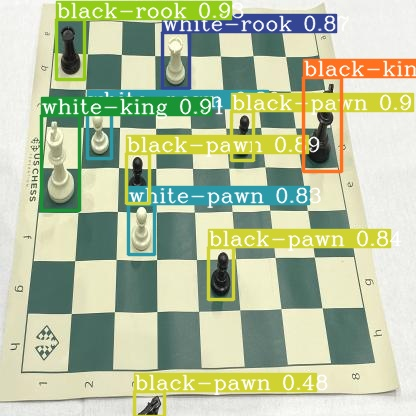

In [14]:
from IPython.display import Image
Image(filename='runs/inference/exp/1.jpg', width=1000)

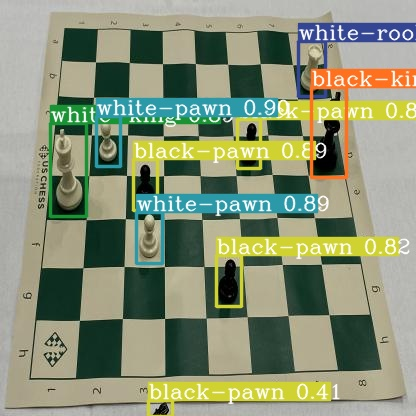

In [15]:
from IPython.display import Image
Image(filename='runs/inference/exp/2.jpg', width=1000)

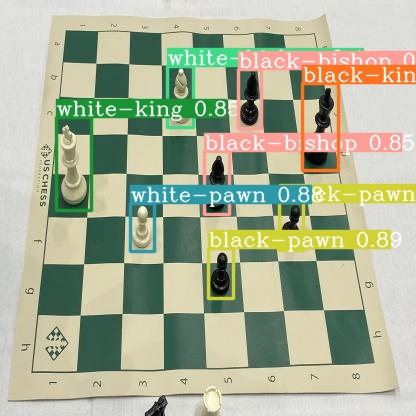

In [16]:
from IPython.display import Image
Image(filename='runs/inference/exp/3.jpg', width=1000)